# Statistical modelling to predict county-level election results

##### Mona Vahdat - Stats And Politics 3

# Introduction:

> There are approach to fit datapoints and make a prediction. In this project we are going to use regression statistic model to have a prediction for the 2008 relative vote share of Republican party. For the very first step to have a regression model, we need to find what is our dependent variable that we want to have a prediction based on another independent variables? Is there any correlation between a dipendent and independent variables? How we can decide which predictor variables are the best for our model?

# 1. Fit a linear regression model that predicts the 2008 relative vote share of the Republican party within a county using the county-level demographic data. What are the independent and dependent variables you’ve chosen? How good is the fit of your model? What metric is a good measure to evaluate your model here? Interpret your results.

> As usual first we need to import some libraries we need, and create our dataframe:

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

C:\Users\sayan\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
df_vote = pd.read_csv('votes_clean.csv')
df_data = pd.read_csv('data_clean.csv')

In [3]:
df_vote.head()

,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),votes16_trumpd,votes16_clintonh,Fips,Democrats 08 pct,Democrats 12 pct,Democrats 16 pct,Republicans 08 pct,Republicans 12 pct,Republicans 16 pct
0,2598.0,2630.0,3860.0,3887.0,3967.0,2364.0,5043,40.229173,40.355992,37.340073,59.770827,59.644008,62.659927
1,2144.0,2099.0,3972.0,4263.0,4917.0,1587.0,5087,35.055592,32.992770,24.400369,64.944408,67.007230,75.599631
2,1935.0,1845.0,3916.0,4136.0,4353.0,1544.0,13159,33.071270,30.847684,26.182805,66.928730,69.152316,73.817195
3,13191.0,12792.0,8181.0,9411.0,8153.0,12652.0,8037,61.720943,57.613836,60.812305,38.279057,42.386164,39.187695
4,2595.0,2442.0,5543.0,5214.0,5021.0,1836.0,13091,31.887442,31.896552,26.775558,68.112558,68.103448,73.224442


In [4]:
pd.set_option('display.max_columns', 70)
df_data.head()

,State,ST,Fips,County,Precincts,Votes,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,Native American Population,Asian American Population,Other Race or Races,Latino Population,Children Under 6 Living in Poverty,Adults 65 and Older Living in Poverty,Total Population,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,Poverty.Rate.below.federal.poverty.threshold,Gini.Coefficient,Child.Poverty.living.in.families.below.the.poverty.line,Management.professional.and.related.occupations,Service.occupations,Sales.and.office.occupations,Farming.fishing.and.forestry.occupations,Construction.extraction.maintenance.and.repair.occupations,Production.transportation.and.material.moving.occupations,White_Asian,SIRE_homogeneity,median_age,Low.birthweight,Teen.births,Children.in.single.parent.households,Adult.smoking,Adult.obesity,Diabetes,Sexually.transmitted.infections,HIV.prevalence.rate,Uninsured,Unemployment,Violent.crime,Injury.deaths
0,Arkansas,AR,5043,"Drew County, Arkansas",17.0,6590.0,19.4,80.6,19.4,5.7,78.5,21988.947300,67.90,27.95,0.15,0.55,0.85,2.65,34.15,14.40,18604,73.5,23.45,0.469,36.95,28.35,18.25,20.15,3.60,9.40,20.20,68.45,0.539968,36.8,0.10,47.7,0.429,0.181,0.323,0.126,747.3,79.9,0.197,0.108,449.02,82.0
1,Arkansas,AR,5087,"Madison County, Arkansas",20.0,6829.0,24.2,75.8,13.4,4.1,76.4,23365.948890,92.00,0.25,1.25,0.30,1.50,4.70,26.20,18.45,15597,43.8,18.20,0.446,25.15,25.15,16.85,19.55,2.90,16.20,19.40,92.30,0.849006,38.5,0.07,49.0,0.179,0.304,0.328,0.135,247.2,131.3,0.239,0.053,245.83,96.8
2,Georgia,GA,13159,"Jasper County, Georgia",3.0,6016.0,21.7,78.3,13.3,5.6,70.2,25363.060950,72.70,22.20,0.40,0.10,1.05,3.55,17.60,17.95,13744,36.5,18.05,0.451,27.60,21.60,17.15,22.60,4.35,15.10,19.25,72.80,0.579201,38.1,0.09,54.1,0.381,0.210,0.298,0.118,324.1,402.4,0.239,0.096,205.60,71.6
3,Colorado,CO,8037,"Eagle County, Colorado",30.0,22611.0,12.8,87.2,45.9,11.7,64.1,35484.543175,68.40,0.30,0.25,1.15,1.10,28.90,11.65,4.85,51405,50.7,9.40,0.464,12.05,32.90,24.80,20.05,0.45,15.50,6.30,69.55,0.551646,33.4,0.09,41.3,0.204,0.095,0.132,0.036,190.9,133.7,0.230,0.081,123.88,42.9
4,Georgia,GA,13091,"Dodge County, Georgia",16.0,6995.0,23.1,76.9,13.8,4.8,61.5,26927.608255,66.15,29.80,0.15,0.45,0.65,2.80,20.65,20.60,20745,41.5,21.15,0.464,23.70,26.15,20.05,22.00,1.60,11.35,18.85,66.60,0.527235,37.7,0.12,64.0,0.453,0.189,0.358,0.153,497.9,315.8,0.208,0.115,477.48,79.4


In [5]:
df_merge = df_data.merge(df_vote, on = 'Fips')

In [6]:
df_merge.head()

,State,ST,Fips,County,Precincts,Votes,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,Native American Population,Asian American Population,Other Race or Races,Latino Population,Children Under 6 Living in Poverty,Adults 65 and Older Living in Poverty,Total Population,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,Poverty.Rate.below.federal.poverty.threshold,Gini.Coefficient,Child.Poverty.living.in.families.below.the.poverty.line,Management.professional.and.related.occupations,Service.occupations,Sales.and.office.occupations,Farming.fishing.and.forestry.occupations,Construction.extraction.maintenance.and.repair.occupations,Production.transportation.and.material.moving.occupations,White_Asian,SIRE_homogeneity,median_age,Low.birthweight,Teen.births,Children.in.single.parent.households,Adult.smoking,Adult.obesity,Diabetes,Sexually.transmitted.infections,HIV.prevalence.rate,Uninsured,Unemployment,Violent.crime,Injury.deaths,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),votes16_trumpd,votes16_clintonh,Democrats 08 pct,Democrats 12 pct,Democrats 16 pct,Republicans 08 pct,Republicans 12 pct,Republicans 16 pct
0,Arkansas,AR,5043,"Drew County, Arkansas",17.0,6590.0,19.4,80.6,19.4,5.7,78.5,21988.947300,67.90,27.95,0.15,0.55,0.85,2.65,34.15,14.40,18604,73.5,23.45,0.469,36.95,28.35,18.25,20.15,3.60,9.40,20.20,68.45,0.539968,36.8,0.10,47.7,0.429,0.181,0.323,0.126,747.3,79.9,0.197,0.108,449.02,82.0,2598.0,2630.0,3860.0,3887.0,3967.0,2364.0,40.229173,40.355992,37.340073,59.770827,59.644008,62.659927
1,Arkansas,AR,5087,"Madison County, Arkansas",20.0,6829.0,24.2,75.8,13.4,4.1,76.4,23365.948890,92.00,0.25,1.25,0.30,1.50,4.70,26.20,18.45,15597,43.8,18.20,0.446,25.15,25.15,16.85,19.55,2.90,16.20,19.40,92.30,0.849006,38.5,0.07,49.0,0.179,0.304,0.328,0.135,247.2,131.3,0.239,0.053,245.83,96.8,2144.0,2099.0,3972.0,4263.0,4917.0,1587.0,35.055592,32.992770,24.400369,64.944408,67.007230,75.599631
2,Georgia,GA,13159,"Jasper County, Georgia",3.0,6016.0,21.7,78.3,13.3,5.6,70.2,25363.060950,72.70,22.20,0.40,0.10,1.05,3.55,17.60,17.95,13744,36.5,18.05,0.451,27.60,21.60,17.15,22.60,4.35,15.10,19.25,72.80,0.579201,38.1,0.09,54.1,0.381,0.210,0.298,0.118,324.1,402.4,0.239,0.096,205.60,71.6,1935.0,1845.0,3916.0,4136.0,4353.0,1544.0,33.071270,30.847684,26.182805,66.928730,69.152316,73.817195
3,Colorado,CO,8037,"Eagle County, Colorado",30.0,22611.0,12.8,87.2,45.9,11.7,64.1,35484.543175,68.40,0.30,0.25,1.15,1.10,28.90,11.65,4.85,51405,50.7,9.40,0.464,12.05,32.90,24.80,20.05,0.45,15.50,6.30,69.55,0.551646,33.4,0.09,41.3,0.204,0.095,0.132,0.036,190.9,133.7,0.230,0.081,123.88,42.9,13191.0,12792.0,8181.0,9411.0,8153.0,12652.0,61.720943,57.613836,60.812305,38.279057,42.386164,39.187695
4,Georgia,GA,13091,"Dodge County, Georgia",16.0,6995.0,23.1,76.9,13.8,4.8,61.5,26927.608255,66.15,29.80,0.15,0.45,0.65,2.80,20.65,20.60,20745,41.5,21.15,0.464,23.70,26.15,20.05,22.00,1.60,11.35,18.85,66.60,0.527235,37.7,0.12,64.0,0.453,0.189,0.358,0.153,497.9,315.8,0.208,0.115,477.48,79.4,2595.0,2442.0,5543.0,5214.0,5021.0,1836.0,31.887442,31.896552,26.775558,68.112558,68.103448,73.224442


> Linear regression model is about relationship between two continus variables. So, as we are going to have a linear regression in this part, we need to drop categorical columns like State, ST and County.

In [7]:
df_merge_numerical = df_merge.drop(columns = ['State', 'ST', 'County'])

>Now that we have a dataframe with just numerical columns, let's see which column seems that has no any relatin with our goal which is being as a predictive variable. For example we can remove Fips column because it stands for identification with a unique code for each county. Also, we don't need another party as our independent variable, because there is an obvious strong negative correlation, for example between Democrats and Republicans in 2008, and these parties in each election could be a depnedent variable or prediction variable individually. So, we are going to remove them too.

In [8]:
df_merge_numerical = df_merge_numerical.drop(columns = ['Fips',
                                                        'Precincts',
                                                        'Democrats 08 (Votes)',
                                                        'Democrats 12 (Votes)',
                                                        'Republicans 08 (Votes)',
                                                        'Republicans 12 (Votes)',
                                                        'votes16_trumpd',
                                                        'votes16_clintonh',
                                                        'Democrats 08 pct',
                                                        'Democrats 12 pct',
                                                        'Democrats 16 pct',
                                                        'Republicans 08 pct',
                                                        'Republicans 12 pct',
                                                        'Republicans 16 pct'])


> ### What are the independent and dependent variables you’ve chosen?

> Now that we have all numerical variables, we are going to set all the variables as predictor values, and see some information (using sm.OLS) about them to make the decision of which one could be more important predictors. Obviously, the dependent variable is the 2008 relative vote share of the Republican party and the independent variables would be all variables in the *df_merge_numerical* datframe. Let's fit a linear regression model based on our variables:



>   (Independent variables are assigned to X and dependent variable is assigned to y)

In [9]:
X = df_merge_numerical
y = df_merge['Republicans 08 pct']

In [10]:
X_withconst = sm.add_constant(X)

C:\Users\sayan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [11]:
regression_model = sm.OLS(y, X_withconst)
regression_model_result = regression_model.fit()
regression_model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Republicans 08 pct   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     163.1
Date:                Sun, 27 Oct 2019   Prob (F-statistic):               0.00
Time:                        22:24:00   Log-Likelihood:                -10852.
No. Observations:                3109   AIC:                         2.179e+04
Df Residuals:                    3068   BIC:                         2.203e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                        172.7553    408.387      0.423      0.672    -627.985     973.495
Votes                                                      -3.511e-05   6.06e-06     -5.797      0.000    -4.7e-05   -2.32e-05
Less Than High School Diploma                                 -0.0077      0.091     -0.085      0.933      -0.186       0.171
At Least High School Diploma                                   0.0238      0.085      0.281      0.779      -0.142       0.190
At Least Bachelors's Degree                                   -0.2062      0.067     -3.056      0.002      -0.338      -0.074
Graduate Degree                                               -0.7510      0.114     -6.560      0.000      -0.975      -0.527
School Enrollment                                              0.0958      0.037      2.611      0.009       0.024       0.168
Median Earnings 2010                                        2.295e-06   5.73e-05      0.040      0.968      -0.000       0.000
White (Not Latino) Population                                  0.2660      0.987      0.269      0.788      -1.670       2.202
African American Population                                   -0.5737      2.958     -0.194      0.846      -6.374       5.227
Native American Population                                    -0.6860      2.959     -0.232      0.817      -6.487       5.115
Asian American Population                                     -0.4916      0.988     -0.498      0.619      -2.428       1.445
Other Race or Races                                           -0.8886      2.963     -0.300      0.764      -6.699       4.922
Latino Population                                             -0.5226      2.959     -0.177      0.860      -6.324       5.279
Children Under 6 Living in Poverty                            -0.0403      0.028     -1.445      0.148      -0.095       0.014
Adults 65 and Older Living in Poverty                          0.0542      0.047      1.151      0.250      -0.038       0.146
Total Population                                            9.107e-06   2.09e-06      4.366      0.000    5.02e-06    1.32e-05
Preschool.Enrollment.Ratio.enrolled.ages.3.and.4              -0.0104      0.011     -0.919      0.358      -0.033       0.012
Poverty.Rate.below.federal.poverty.threshold                  -0.5046      0.098     -5.145      0.000      -0.697      -0.312
Gini.Coefficient                                              15.3527      5.972      2.571      0.010       3.642      27.063
Child.Poverty.living.in.families.below.the.poverty.line        0.1596      0.058      2.755      0.006       0.046       0.273
Management.professional.and.related

> ### How good is the fit of your model? 

> At this stage, we found the information about variables. First, the amount of R-squared is pretty good which is nearly 0.7. This amount is reasonable to say that our model fit pretty good, but it isn't enough to make a final conclusion. Second, we have some information about the coefficiency namly coef which tells us the coefficient of each variable, but they are not enough as evidence to deciede whether are important independent variables. We need to decide about our predictor varaibales. The first thing is to identify the variables that are collinear. The way to find these variables is first figure out the correlation between all variables that we assuemd as our independent variables. We set + 0.7 and - 0.7 as a threshold to find the strong correlation between each pair of variables. 

> As we have 41 columns that can be considered as an independent variable, having a look at correaltion between all of them in one dataframe, may be a little huge, so we are going to get a chunck of every column that can be in a related categorical dataframe. For example, we can have a dataframe related to education, or occupation and so on.

> Let's look at the correlation between variables in education category:

In [12]:
df_education = df_merge_numerical[['Preschool.Enrollment.Ratio.enrolled.ages.3.and.4',
                                 'School Enrollment',
                                 'Graduate Degree',
                                 "At Least Bachelors's Degree",
                                 'At Least High School Diploma',
                                 'Less Than High School Diploma'                                 
                                 ]].copy()

In [13]:
df_education.corr()

,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,School Enrollment,Graduate Degree,At Least Bachelors's Degree,At Least High School Diploma,Less Than High School Diploma
Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,1.000000,0.325967,0.268352,0.253496,0.131538,-0.137987
School Enrollment,0.325967,1.000000,0.387424,0.411245,0.370422,-0.372134
Graduate Degree,0.268352,0.387424,1.000000,0.921379,0.467581,-0.476628
At Least Bachelors's Degree,0.253496,0.411245,0.921379,1.000000,0.607997,-0.616330
At Least High School Diploma,0.131538,0.370422,0.467581,0.607997,1.000000,-0.970912
Less Than High School Diploma,-0.137987,-0.372134,-0.476628,-0.616330,-0.970912,1.000000


> We can see that there is a strong correlation between some of the variables. So the approach for how to get rid of one of the pairs  variable is to calculate the R_squared and remove the column which has the lowest R_squared in comparison with its counterpart accordin to fit the model with the Republicans vote share in 2008 as our dependent variable.

* __Graduate Degree__ vs __At Least Bachelors's Degree__: We are going to remove At Least Bachelors's Degree variable.
* __At Least High School Diploma__ vs __Less Than High School Diploma__: We are going to remove At Least High School Diploma variable.


In [14]:
def calculate_Rsquared(prediction, predictor):
    
    y = prediction
    X = predictor  
    X_withconstant = sm.add_constant(X)
    rml = sm.OLS(y, X_withconstant)
    result = rml.fit()
    r_squared = result.rsquared
    
    return r_squared
    

In [15]:
a = calculate_Rsquared(df_merge['Republicans 08 pct'], df_merge_numerical["At Least Bachelors's Degree"])
b = calculate_Rsquared(df_merge['Republicans 08 pct'], df_merge_numerical["Graduate Degree"])
print("R_squared for At Least Bachelors's Degree: ", a)
print("R_squared for At Graduate Degree: ", b)

R_squared for At Least Bachelors's Degree:  0.09402566850615535
R_squared for At Graduate Degree:  0.13672668006094035


In [16]:
a = calculate_Rsquared(df_merge['Republicans 08 pct'], df_merge_numerical["At Least High School Diploma"])
b = calculate_Rsquared(df_merge['Republicans 08 pct'], df_merge_numerical["Less Than High School Diploma"])
print("R_squared for At Least High School Diploma: ", a)
print("R_squared for Less Than High School Diploma: ", b)

R_squared for At Least High School Diploma:  0.007488878537337151
R_squared for Less Than High School Diploma:  0.007740345387958425


>Let's look at the correlation between variables in occupation category:

In [21]:
df_occupations = df_merge_numerical[['Production.transportation.and.material.moving.occupations',
                                 'Farming.fishing.and.forestry.occupations',
                                 'Sales.and.office.occupations',
                                 'Management.professional.and.related.occupations',
                                 'Service.occupations'
                                 ]].copy()

In [22]:
df_occupations.corr()

,Production.transportation.and.material.moving.occupations,Farming.fishing.and.forestry.occupations,Sales.and.office.occupations,Management.professional.and.related.occupations,Service.occupations
Production.transportation.and.material.moving.occupations,1.000000,-0.093404,-0.243453,-0.664602,-0.220266
Farming.fishing.and.forestry.occupations,-0.093404,1.000000,-0.483362,-0.029265,-0.062640
Sales.and.office.occupations,-0.243453,-0.483362,1.000000,0.027396,-0.065686
Management.professional.and.related.occupations,-0.664602,-0.029265,0.027396,1.000000,-0.270957
Service.occupations,-0.220266,-0.062640,-0.065686,-0.270957,1.000000


>We can see from the table above, there is no significant correlation between each occupation. So, we don't need to get rid of any occupations from our collinear list.

>Let's look at the correlation between variables in racial category:

In [23]:
df_racial = df_merge_numerical[[ 'White_Asian',
                                 'Latino Population',
                                 'Other Race or Races',
                                 'Native American Population',
                                 'Asian American Population',
                                 'African American Population',
                                 'White (Not Latino) Population'
                                 ]].copy()

In [24]:
df_racial.corr()

,White_Asian,Latino Population,Other Race or Races,Native American Population,Asian American Population,African American Population,White (Not Latino) Population
White_Asian,1.000000,-0.596833,-0.080559,-0.251370,-0.139085,-0.653388,0.993353
Latino Population,-0.596833,1.000000,-0.012742,-0.027834,0.150052,-0.108664,-0.600658
Other Race or Races,-0.080559,-0.012742,1.000000,0.230290,0.477809,-0.084340,-0.134262
Native American Population,-0.251370,-0.027834,0.230290,1.000000,-0.051766,-0.094107,-0.239618
Asian American Population,-0.139085,0.150052,0.477809,-0.051766,1.000000,0.018932,-0.252151
African American Population,-0.653388,-0.108664,-0.084340,-0.094107,0.018932,1.000000,-0.640682
White (Not Latino) Population,0.993353,-0.600658,-0.134262,-0.239618,-0.252151,-0.640682,1.000000


* __White_Asian__ vs __White (Not Latino) Population__: We are going to remove White (Not Latino) Population variable.


In [25]:
a = calculate_Rsquared(df_merge['Republicans 08 pct'], df_merge_numerical["White_Asian"])
b = calculate_Rsquared(df_merge['Republicans 08 pct'], df_merge_numerical["White (Not Latino) Population"])
print("R_squared for White_Asian: ", a)
print("R_squared for White (Not Latino) Population: ", b)

R_squared for White_Asian:  0.10666418829710966
R_squared for White (Not Latino) Population:  0.12695993979674203


In [26]:
education_occupation_racial = list(df_education.columns) + list(df_occupations.columns) + list(df_racial.columns)


In [27]:
rest_of_the_columns = df_merge_numerical.drop(columns = education_occupation_racial)

> Now let's see the correlation between the rest of the columns from the original datafram. For convenience, we collected these columns in a new dataframe called *rest_of_the_columns*.

In [28]:
rest_of_the_columns.corr()

,Votes,Median Earnings 2010,Children Under 6 Living in Poverty,Adults 65 and Older Living in Poverty,Total Population,Poverty.Rate.below.federal.poverty.threshold,Gini.Coefficient,Child.Poverty.living.in.families.below.the.poverty.line,Construction.extraction.maintenance.and.repair.occupations,SIRE_homogeneity,median_age,Low.birthweight,Teen.births,Children.in.single.parent.households,Adult.smoking,Adult.obesity,Diabetes,Sexually.transmitted.infections,HIV.prevalence.rate,Uninsured,Unemployment,Violent.crime,Injury.deaths
Votes,1.000000,0.354934,-0.132608,-0.148627,0.970641,-0.133869,0.146348,-0.120440,-0.240031,-0.290143,-0.194113,-0.031708,-0.144880,0.035932,-0.216702,-0.264876,-0.203016,0.134210,0.298646,-0.083670,0.041772,0.253645,-0.261518
Median Earnings 2010,0.354934,1.000000,-0.546866,-0.414785,0.282967,-0.656582,-0.302085,-0.578020,-0.101054,-0.082234,-0.021403,-0.208927,-0.383120,-0.301206,-0.270869,-0.332142,-0.325508,-0.159135,0.079372,-0.435921,-0.172287,-0.028417,-0.378984
Children Under 6 Living in Poverty,-0.132608,-0.546866,1.000000,0.528618,-0.092513,0.825143,0.452463,0.896180,0.089357,-0.245285,-0.092251,0.482729,0.610777,0.607271,0.355567,0.415649,0.508109,0.409554,0.145252,0.435174,0.416673,0.279318,0.372786
Adults 65 and Older Living in Poverty,-0.148627,-0.414785,0.528618,1.000000,-0.106416,0.709852,0.397681,0.625573,0.164843,-0.170582,-0.068682,0.480088,0.530662,0.399903,0.283220,0.415015,0.469955,0.326030,0.148920,0.382785,0.297742,0.151939,0.353353
Total Population,0.970641,0.282967,-0.092513,-0.106416,1.000000,-0.088586,0.140179,-0.076997,-0.198063,-0.277258,-0.189680,-0.024315,-0.099223,0.047167,-0.187076,-0.223647,-0.172490,0.132897,0.283426,-0.038080,0.057495,0.237549,-0.226899
Poverty.Rate.below.federal.poverty.threshold,-0.133869,-0.656582,0.825143,0.709852,-0.088586,1.000000,0.565295,0.923652,0.086618,-0.293014,-0.255789,0.530832,0.637833,0.624100,0.351955,0.447076,0.510965,0.489224,0.175996,0.505132,0.459166,0.300273,0.397465
Gini.Coefficient,0.146348,-0.302085,0.452463,0.397681,0.140179,0.565295,1.000000,0.498391,-0.106112,-0.327951,-0.116186,0.397452,0.312703,0.437277,0.073182,0.080514,0.250275,0.410649,0.283947,0.292959,0.243177,0.336639,0.155671
Child.Poverty.living.in.families.below.the.poverty.line,-0.120440,-0.578020,0.896180,0.625573,-0.076997,0.923652,0.498391,1.000000,0.112980,-0.302498,-0.126207,0.549405,0.675668,0.663414,0.378104,0.459707,0.566553,0.473730,0.194076,0.501314,0.473479,0.320539,0.413264
Construction.extraction.maintenance.and.repair.occupations,-0.240031,-0.101054,0.089357,0.164843,-0.198063,0.086618,-0.106112,0.112980,1.000000,0.035968,0.137102,0.103265,0.255605,-0.045619,0.260397,0.103108,0.176527,-0.181105,-0.147604,0.358473,0.040199,-0.080624,0.358763
SIRE_homogeneity,-0.290143,-0.082234,-0.245285,-0.170582,-0.277258,-0.293014,-0.327951,-0.302498,0.035968,1.000000,0.449061,-0.402523,-0.425743,-0.505536,0.087347,-0.046165,-0.130539,-0.585235,-0.433992,-0.440478,-0.227305,-0.501144,0.055407


* __Total Population__ vs __Votes__: We are going to remove Total Population variable.
* __Child.Poverty.living.in.families.below.the.poverty.line__ vs __Children Under 6 Living in Poverty__: We are going to remove Children Under 6 Living in Poverty variable.
* __Poverty.Rate.below.federal.poverty.threshold__ vs __Adults 65 and Older Living in Poverty__: We are going to remove Adults 65 and Older Living in Poverty variable.
* __Children Under 6 Living in Poverty__ vs __Poverty.Rate.below.federal.poverty.threshold__: We are going to remove Children Under 6 Living in Poverty variable.
* __Child.Poverty.living.in.families.below.the.poverty.line__ vs __Poverty.Rate.below.federal.poverty.threshold__: We are going to remove Child.Poverty.living.in.families.below.the.poverty.line variable.
* __Adult.obesity__ vs __Diabetes__: We are going to remove Adult.obesity variable.



In [29]:
a = calculate_Rsquared(df_merge['Republicans 08 pct'], df_merge_numerical["Total Population"])
b = calculate_Rsquared(df_merge['Republicans 08 pct'], df_merge_numerical["Votes"])
print("R_squared for Total Population: ", a)
print("R_squared for Votes: ", b)

R_squared for Total Population:  0.06600049754951787
R_squared for Votes:  0.08352084079193578


In [30]:
a = calculate_Rsquared(df_merge['Republicans 08 pct'], df_merge_numerical["Child.Poverty.living.in.families.below.the.poverty.line"])
b = calculate_Rsquared(df_merge['Republicans 08 pct'], df_merge_numerical["Children Under 6 Living in Poverty"])
print("R_squared for Child.Poverty.living.in.families.below.the.poverty.line: ", a)
print("R_squared for Children Under 6 Living in Poverty: ", b)

R_squared for Child.Poverty.living.in.families.below.the.poverty.line:  0.009346907110992064
R_squared for Children Under 6 Living in Poverty:  0.00781432927676129


In [31]:
a = calculate_Rsquared(df_merge['Republicans 08 pct'], df_merge_numerical["At Least Bachelors's Degree"])
b = calculate_Rsquared(df_merge['Republicans 08 pct'], df_merge_numerical["Adults 65 and Older Living in Poverty"])
print("R_squared for At Least Bachelors's Degree: ", a)
print("R_squared for Adults 65 and Older Living in Poverty: ", b)

R_squared for At Least Bachelors's Degree:  0.09402566850615535
R_squared for Adults 65 and Older Living in Poverty:  0.0009573561903652994


In [32]:
a = calculate_Rsquared(df_merge['Republicans 08 pct'], df_merge_numerical["Children Under 6 Living in Poverty"])
b = calculate_Rsquared(df_merge['Republicans 08 pct'], df_merge_numerical["Poverty.Rate.below.federal.poverty.threshold"])
print("R_squared for Children Under 6 Living in Poverty: ", a)
print("R_squared for Poverty.Rate.below.federal.poverty.threshold: ", b)

R_squared for Children Under 6 Living in Poverty:  0.00781432927676129
R_squared for Poverty.Rate.below.federal.poverty.threshold:  0.016238072140667303


In [33]:
a = calculate_Rsquared(df_merge['Republicans 08 pct'], df_merge_numerical["Child.Poverty.living.in.families.below.the.poverty.line"])
b = calculate_Rsquared(df_merge['Republicans 08 pct'], df_merge_numerical["Poverty.Rate.below.federal.poverty.threshold"])
print("R_squared for Child.Poverty.living.in.families.below.the.poverty.line: ", a)
print("R_squared for Poverty.Rate.below.federal.poverty.threshold: ", b)

R_squared for Child.Poverty.living.in.families.below.the.poverty.line:  0.009346907110992064
R_squared for Poverty.Rate.below.federal.poverty.threshold:  0.016238072140667303


In [34]:
a = calculate_Rsquared(df_merge['Republicans 08 pct'], df_merge_numerical["Adult.obesity"])
b = calculate_Rsquared(df_merge['Republicans 08 pct'], df_merge_numerical["Diabetes"])
print("R_squared for Adult.obesity: ", a)
print("R_squared for Diabetes: ", b)

R_squared for Adult.obesity:  0.008413331810981362
R_squared for Diabetes:  0.013888992874851347


> At this step, we reached out 33 columns out of 41 columns and now, we know which columns are collinear. So, the next step is to remove these columns and fit our model again and look at the summary to find some statistical fact to see whether we can get rid som other columns or not. 

In [35]:
df_merge_numerical_new = df_merge_numerical.drop(columns = ['At Least High School Diploma',
                                                            "At Least Bachelors's Degree",
                                                            'White (Not Latino) Population',
                                                            'Children Under 6 Living in Poverty',
                                                            'Total Population',
                                                            'Adults 65 and Older Living in Poverty',
                                                            'Children Under 6 Living in Poverty',
                                                            'Child.Poverty.living.in.families.below.the.poverty.line',
                                                            'Adult.obesity'])

In [36]:
df_merge_numerical_new.shape

(3109, 33)

In [37]:
y = df_merge['Republicans 08 pct']
X = df_merge_numerical_new
X_withconstant = sm.add_constant(X)

lm = sm.OLS(y, X_withconstant)
res = lm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Republicans 08 pct   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     194.4
Date:                Sun, 27 Oct 2019   Prob (F-statistic):               0.00
Time:                        22:25:37   Log-Likelihood:                -10872.
No. Observations:                3109   AIC:                         2.181e+04
Df Residuals:                    3075   BIC:                         2.202e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                        218.7768    410.163      0.533      0.594    -585.444    1022.997
Votes                                                       -9.42e-06   1.65e-06     -5.709      0.000   -1.27e-05   -6.18e-06
Less Than High School Diploma                                  0.0115      0.042      0.271      0.787      -0.072       0.094
Graduate Degree                                               -1.0567      0.070    -15.111      0.000      -1.194      -0.920
School Enrollment                                              0.0833      0.037      2.277      0.023       0.012       0.155
Median Earnings 2010                                       -2.292e-05   5.48e-05     -0.418      0.676      -0.000    8.45e-05
African American Population                                   -1.0378      2.971     -0.349      0.727      -6.863       4.788
Native American Population                                    -1.1453      2.972     -0.385      0.700      -6.972       4.681
Asian American Population                                     -0.7352      0.103     -7.150      0.000      -0.937      -0.534
Other Race or Races                                           -1.3446      2.976     -0.452      0.651      -7.180       4.491
Latino Population                                             -0.9701      2.972     -0.326      0.744      -6.797       4.857
Preschool.Enrollment.Ratio.enrolled.ages.3.and.4              -0.0087      0.011     -0.764      0.445      -0.031       0.014
Poverty.Rate.below.federal.poverty.threshold                  -0.3190      0.056     -5.710      0.000      -0.429      -0.209
Gini.Coefficient                                              10.7004      5.836      1.833      0.067      -0.743      22.144
Management.professional.and.related.occupations               -0.5917      2.852     -0.208      0.836      -6.183       5.000
Service.occupations                                           -1.1995      2.852     -0.421      0.674      -6.791       4.392
Sales.and.office.occupations                                  -0.7921      2.851     -0.278      0.781      -6.381       4.797
Farming.fishing.and.forestry.occupations                      -0.5789      2.851     -0.203      0.839      -6.170       5.012
Construction.extraction.maintenance.and.repair.occupations    -0.6529      2.851     -0.229      0.819      -6.243       4.937
Production.transportation.and.material.moving.occupations     -1.1045      2.851     -0.387      0.699      -6.695       4.486
White_Asian                                                   -0.4197      2.972     -0.141      0.888      -6.246       5.407
SIRE_homogeneity                   

> ### What metric is a good measure to evaluate your model here?

> At this point we can consider three parameters from the table above to decide whether remove any variable as our predictor. These parameters are coef stands for coefficient, stderr as standard deviation and P>|t| as p-value. If there would be any ambigous relation between these three we can remove that variable. For example if standard deviation is equal to or greater than the value of coefficient we can claim that the distribution of residuals is significant. Also, we need to consider the p-value less than 0.05. p-value shows the significant relation between dependent variable and predictive variable.

In [38]:
def get_pvalues(result): 
    '''
    get one parameters which is result of OLS
    calculate p-values of each coefficient 
    store all coefficients that their p-value are greater than 0.05
    '''
    
    independent_vars_with_high_pvalue = []
    index = 0

    for value in list(result.pvalues.values):
        if value > 0.05:
            independent_vars_with_high_pvalue.append(res.pvalues.index[index])
        index += 1
    return independent_vars_with_high_pvalue

In [39]:
columns_with_high_pvalue = get_pvalues(res)
columns_with_high_pvalue

['const',
 'Less Than High School Diploma',
 'Median Earnings 2010',
 'African American Population',
 'Native American Population',
 'Other Race or Races',
 'Latino Population',
 'Preschool.Enrollment.Ratio.enrolled.ages.3.and.4',
 'Gini.Coefficient',
 'Management.professional.and.related.occupations',
 'Service.occupations',
 'Sales.and.office.occupations',
 'Farming.fishing.and.forestry.occupations',
 'Construction.extraction.maintenance.and.repair.occupations',
 'Production.transportation.and.material.moving.occupations',
 'White_Asian',
 'HIV.prevalence.rate',
 'Violent.crime',
 'Injury.deaths']

> We are going to remove all column above instead of const, because their p-value are greater than 0.05. In some of them we can see that the value of standard deviation is greater than coefficent variable that means we are more confident to remove them from out dataframe to have a better model.

In [40]:
df_merge_numerical_15columns = df_merge_numerical_new.drop(columns = columns_with_high_pvalue[1:])

In [41]:
y = df_merge['Republicans 08 pct']
X = df_merge_numerical_15columns
X_withconstant = sm.add_constant(X)

lm = sm.OLS(y, X_withconstant)
res = lm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Republicans 08 pct   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     245.4
Date:                Sun, 27 Oct 2019   Prob (F-statistic):               0.00
Time:                        22:25:46   Log-Likelihood:                -11405.
No. Observations:                3109   AIC:                         2.284e+04
Df Residuals:                    3093   BIC:                         2.294e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           63.5330      4.059     15.652      0.000      55.574      71.492
Votes                                        -9.118e-06   1.82e-06     -5.016      0.000   -1.27e-05   -5.55e-06
Graduate Degree                                 -0.4967      0.064     -7.815      0.000      -0.621      -0.372
School Enrollment                                0.0481      0.039      1.220      0.222      -0.029       0.125
Asian American Population                       -0.6288      0.104     -6.057      0.000      -0.832      -0.425
Poverty.Rate.below.federal.poverty.threshold    -0.5285      0.046    -11.447      0.000      -0.619      -0.438
SIRE_homogeneity                                 1.2622      1.664      0.759      0.448      -2.000       4.525
median_age                                      -0.3536      0.046     -7.717      0.000      -0.443      -0.264
Low.birthweight                                 51.9822     12.010      4.328      0.000      28.433      75.531
Teen.births                                      0.1080      0.016      6.810      0.000       0.077       0.139
Children.in.single.parent.households           -45.0189      2.886    -15.596      0.000     -50.679     -39.359
Adult.smoking                                    4.8498      3.656      1.327      0.185      -2.318      12.018
Diabetes                                       166.5593     11.422     14.582      0.000     144.163     188.956
Sexually.transmitted.infections                 -0.0135      0.001    -12.180      0.000      -0.016      -0.011
Uninsured                                       87.8638      4.866     18.058      0.000      78.324      97.404
Unemployment                                  -112.3626      7.568    -14.846      0.000    -127.202     -97.523
==============================================================================
Omnibus:                      187.075   Durbin-Watson:                   1.801
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              308.244
Skew:                          -0.477   Prob(JB):                     1.16e-67
Kurtosis:                       4.212   Cond. No.                     9.23e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.23e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> By looking at the value of p-values in the table above, 80% of independent variables have the p-value less than 0.05 wich is great and it means that these variables are significant in predicting the Republicans vote share. 

> ### Conlcusion:

>> The final R-squared with 15 independent variable as our predictors is 54% that is good.

In [42]:
model_residuals = res.resid

In [43]:
import matplotlib.pyplot as plt

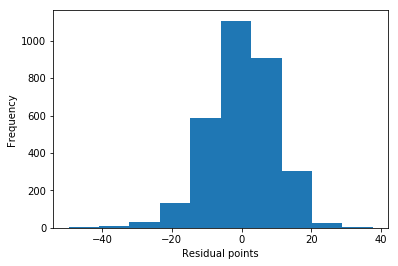

In [44]:
plt.figure()
plt.hist(model_residuals,bins = 10)
plt.xlabel("Residual points")
plt.ylabel("Frequency")
plt.show()

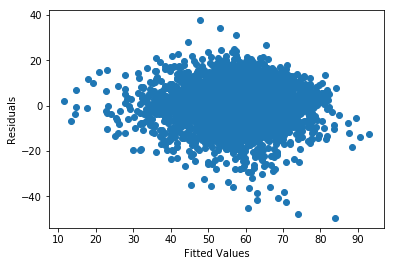

In [45]:
plt.figure()
plt.scatter(res.fittedvalues,model_residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


> If we look at the histgoram of residual points, it seems that the distribution is pretty normal which means that the residual points are distributed normally, they didn't follow specific patterns. This is what we want to make sure the model fits good. The claims can get from the plot above too.

# 2. Fit a logistic regression model using the same demographic data to predict which political party will take the majority of a county’s votes. (Please use the statsmodels package to create your logistic regression model here, not scikit-learn.) When building your model, answer the following questions: a) How good is the fit of your model? What metric is a good measure to evaluate your model here? Interpret your results.

>For the first step we are going to define our dependent and independent variables as usual and fit our model using all demographic data as independent variables, and each party as a dependent variable:

> Because of the range in logistic regression which is between 0 and 1, we should change votes share range from 0 to 100, to 0 to 1 by deviding by 100.

In [46]:
df_merge['Republicans 08 pct'] = df_merge['Republicans 08 pct'].values / 100

In [47]:
X = df_merge_numerical
y = df_merge['Republicans 08 pct']

In [48]:
X_withconstant = sm.add_constant(X)
logreg = sm.Logit(y, X_withconstant)
logreg_results = logreg.fit()
logreg_results.summary()

Optimization terminated successfully.
         Current function value: 0.618894
         Iterations 16


C:\Users\sayan\Anaconda3\lib\site-packages\statsmodels\base\model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\sayan\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\sayan\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\sayan\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Republicans 08 pct   No. Observations:                 3109
Model:                          Logit   Df Residuals:                     3068
Method:                           MLE   Df Model:                           40
Date:                Sun, 27 Oct 2019   Pseudo R-squ.:                 -0.1004
Time:                        22:25:51   Log-Likelihood:                -1924.1
converged:                       True   LL-Null:                       -1748.6
                                        LLR p-value:                     1.000
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                          4.0961    106.243      0.039      0.969    -204.137     212.329
Votes                                                      -1.467e-06   1.61e-06     -0.914      0.361   -4.61e-06    1.68e-06
Less Than High School Diploma                                  0.0002      0.027      0.007      0.995      -0.053       0.053
At Least High School Diploma                                   0.0013      0.026      0.050      0.960      -0.049       0.051
At Least Bachelors's Degree                                   -0.0097      0.018     -0.547      0.585      -0.044       0.025
Graduate Degree                                               -0.0317      0.030     -1.053      0.292      -0.091       0.027
School Enrollment                                              0.0046      0.010      0.466      0.641      -0.015       0.024
Median Earnings 2010                                        4.309e-09   1.51e-05      0.000      1.000   -2.95e-05    2.95e-05
White (Not Latino) Population                                  0.0159        nan        nan        nan         nan         nan
African American Population                                   -0.0141      0.769     -0.018      0.985      -1.522       1.494
Native American Population                                    -0.0202      0.769     -0.026      0.979      -1.528       1.488
Asian American Population                                     -0.0192        nan        nan        nan         nan         nan
Other Race or Races                                           -0.0286      0.771     -0.037      0.970      -1.539       1.482
Latino Population                                             -0.0121      0.770     -0.016      0.987      -1.520       1.496
Children Under 6 Living in Poverty                            -0.0017      0.007     -0.228      0.820      -0.016       0.013
Adults 65 and Older Living in Poverty                          0.0019      0.012      0.154      0.878      -0.023       0.026
Total Population                                            3.815e-07   5.52e-07      0.691      0.490   -7.01e-07    1.46e-06
Preschool.Enrollment.Ratio.enrolled.ages.3.and.4              -0.0004      0.003     -0.145      0.884      -0.006       0.005
Poverty.Rate.below.federal.poverty.threshold                  -0.0224      0.026     -0.873      0.383      -0.073       0.028
Gini.Coefficient                                               0.7104      1.586      0.448      0.654      -2.397       3.818
Child.Poverty.living.in.families.below.the.poverty.line        0.0071      0.015      0.463      0.643      -0.023       0.037
Management.professional.and.related.occupations               -0.0204      0.740     -0.028      0.978      -1.472       1.431
Service.occupations                                           -0.0

> Let's check the accuracy of the model with all variables as predictors:

In [49]:
prediction_results = logreg_results.predict(X_withconstant)

In [50]:
binary_prediction_results = np.where(prediction_results > 0.5, 1, 0)
binary_y = np.where(y > 0.5, 1, 0)
(binary_prediction_results == binary_y).sum()

2623

In [51]:
print("The accuracy of the model with all predicotrs is: ", (binary_prediction_results == binary_y).sum() / len(binary_y) * 100, "%")

The accuracy of the model with all predicotrs is:  84.36796397555484 %


> Something that happened in the table above, all variables have high p-values! If we want to reject the variables have p-value with high values, we should get rid of all of them that in this case impossible. So, we just remove the predictor variables that are collinear which we found at the begining and we store them in df_merge_numerical_new, to see if they affect the value of Log-Likelihood or not.

> So, let's assume these variables as our new predictors:

In [52]:
X_new = df_merge_numerical_new
X_new_withconst = sm.add_constant(X_new)

C:\Users\sayan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [53]:
logreg = sm.Logit(y, X_new_withconst)
result = logreg.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.619203
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Republicans 08 pct   No. Observations:                 3109
Model:                          Logit   Df Residuals:                     3075
Method:                           MLE   Df Model:                           33
Date:                Sun, 27 Oct 2019   Pseudo R-squ.:                 -0.1009
Time:                        22:25:54   Log-Likelihood:                -1925.1
converged:                       True   LL-Null:                       -1748.6
                                        LLR p-value:                     1.000
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                          6.6516    106.129      0.063      0.950    -201.358     214.661
Votes                                                       -4.08e-07   4.57e-07     -0.892      0.372    -1.3e-06    4.88e-07
Less Than High School Diploma                                  0.0008      0.011      0.073      0.941      -0.021       0.023
Graduate Degree                                               -0.0456      0.018     -2.470      0.013      -0.082      -0.009
School Enrollment                                              0.0040      0.010      0.412      0.680      -0.015       0.023
Median Earnings 2010                                       -1.103e-06   1.44e-05     -0.077      0.939   -2.93e-05    2.71e-05
African American Population                                   -0.0382      0.768     -0.050      0.960      -1.544       1.468
Native American Population                                    -0.0439      0.768     -0.057      0.954      -1.550       1.462
Asian American Population                                     -0.0341      0.028     -1.198      0.231      -0.090       0.022
Other Race or Races                                           -0.0525      0.770     -0.068      0.946      -1.561       1.456
Latino Population                                             -0.0353      0.769     -0.046      0.963      -1.542       1.471
Preschool.Enrollment.Ratio.enrolled.ages.3.and.4              -0.0004      0.003     -0.125      0.901      -0.006       0.006
Poverty.Rate.below.federal.poverty.threshold                  -0.0144      0.015     -0.976      0.329      -0.043       0.015
Gini.Coefficient                                               0.4946      1.542      0.321      0.748      -2.528       3.518
Management.professional.and.related.occupations               -0.0249      0.739     -0.034      0.973      -1.474       1.424
Service.occupations                                           -0.0525      0.739     -0.071      0.943      -1.502       1.397
Sales.and.office.occupations                                  -0.0355      0.739     -0.048      0.962      -1.484       1.413
Farming.fishing.and.forestry.occupations                      -0.0233      0.739     -0.032      0.975      -1.472       1.426
Construction.extraction.maintenance.and.repair.occupations    -0.0287      0.739     -0.039      0.969      -1.477       1.420
Production.transportation.and.material.moving.occupations     -0.0487      0.739     -0.066      0.948      -1.498       1.400
White_Asian                                                   -0.0110      0.768     -0.014      0.989      -1.517       1.495
SIRE_homogeneity                                              -1.4609      0.514     -2.842      0.004      -2.468      -0.453
median_age                                                    -0.0

> After removing our collinear variables from the predictors, we see that there is no change in Log-Likelihood amount after fitting our model again. Let's try another test to see how our model is good or not. We are going to see the accuracy. To find this value, we need to change our model into a binay form beacuse in logistic regression we need to classify our model as we using sigmoied function which is between 0 and 1 instead of linear function that can have any value. Also, with the part of question, we need to have a comparison between two parties, so we can calassify them as 0 and 1.

> We categorized the value of prediction in 1 if our prediction is more than 0.5 (50%) otherwise in 0. 

In [56]:
predict = result.predict(X_new_withconst)
binary_prediction = np.where(predict > 0.5, 1, 0)

In [57]:
binary_y = np.where(y > 0.5, 1, 0)

In [58]:
print("The accuracy of the model with more optimized predictors: ", (binary_prediction == binary_y).sum() / len(binary_y) * 100, "%")

The accuracy of the model with more optimized predictors:  84.27146992602123 %


> ### How good is the fit of your model? What metric is a good measure to evaluate your model here? Interpret your results.

> In this part, we use all parameters as we used in the previous question. But, the difference between linear regression and logistic regression is that in linear regression we have a variable called R-squared which based on we could evaluate how our model is good. In logistic regression, we don't have R_squared but instead we have Log-Likelihood, but to came up with the question that how model is good, we did observation base on p-values. At the end, by calculating the accuracy, we get that without those variables that are collinear, our model seems to be good fit.

# 3. Now build new models to predict the 2012 and 2016 relative vote share of the Republican party, respectively. How does each of their performances compare to your 2008 model from question 1?

> In this part we are going to have a prediction on Republicans in 2012 and 2016 and have a comparison between these results and the result from 2008. As we found some important parameters in the question 1, we are going to use them as predictors which are stored in *df_merge_numerical_new*,

> ## Republicans vote share in 2012:

> Let's imply predictors and define Republicans vote share in 2012 as an independent variable to see the amount of R_squared:

In [67]:
y = df_merge['Republicans 12 pct']
X = df_merge_numerical_new
X_withconstant = sm.add_constant(X)

lm = sm.OLS(y, X_withconstant)
res = lm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Republicans 12 pct   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     237.4
Date:                Sun, 27 Oct 2019   Prob (F-statistic):               0.00
Time:                        22:30:11   Log-Likelihood:                -10864.
No. Observations:                3109   AIC:                         2.180e+04
Df Residuals:                    3075   BIC:                         2.200e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                        255.5655    409.074      0.625      0.532    -546.521    1057.652
Votes                                                      -9.185e-06   1.65e-06     -5.582      0.000   -1.24e-05   -5.96e-06
Less Than High School Diploma                                  0.0305      0.042      0.723      0.470      -0.052       0.113
Graduate Degree                                               -1.1388      0.070    -16.329      0.000      -1.276      -1.002
School Enrollment                                              0.0664      0.036      1.821      0.069      -0.005       0.138
Median Earnings 2010                                       -5.154e-05   5.47e-05     -0.943      0.346      -0.000    5.57e-05
African American Population                                   -1.8174      2.963     -0.613      0.540      -7.628       3.993
Native American Population                                    -1.8737      2.964     -0.632      0.527      -7.685       3.937
Asian American Population                                     -0.6873      0.103     -6.702      0.000      -0.888      -0.486
Other Race or Races                                           -2.2331      2.968     -0.752      0.452      -8.053       3.587
Latino Population                                             -1.7178      2.964     -0.580      0.562      -7.530       4.094
Preschool.Enrollment.Ratio.enrolled.ages.3.and.4              -0.0136      0.011     -1.193      0.233      -0.036       0.009
Poverty.Rate.below.federal.poverty.threshold                  -0.3435      0.056     -6.165      0.000      -0.453      -0.234
Gini.Coefficient                                              15.5140      5.821      2.665      0.008       4.101      26.927
Management.professional.and.related.occupations               -0.2165      2.844     -0.076      0.939      -5.793       5.360
Service.occupations                                           -0.8063      2.844     -0.284      0.777      -6.383       4.770
Sales.and.office.occupations                                  -0.4589      2.843     -0.161      0.872      -6.033       5.115
Farming.fishing.and.forestry.occupations                      -0.3056      2.844     -0.107      0.914      -5.882       5.270
Construction.extraction.maintenance.and.repair.occupations    -0.2887      2.843     -0.102      0.919      -5.864       5.286
Production.transportation.and.material.moving.occupations     -0.7474      2.844     -0.263      0.793      -6.323       4.828
White_Asian                                                   -1.1047      2.964     -0.373      0.709      -6.916       4.706
SIRE_homogeneity                   

In [68]:
get_pvalues(res)

['const',
 'Less Than High School Diploma',
 'School Enrollment',
 'Median Earnings 2010',
 'African American Population',
 'Native American Population',
 'Other Race or Races',
 'Latino Population',
 'Preschool.Enrollment.Ratio.enrolled.ages.3.and.4',
 'Management.professional.and.related.occupations',
 'Service.occupations',
 'Sales.and.office.occupations',
 'Farming.fishing.and.forestry.occupations',
 'Construction.extraction.maintenance.and.repair.occupations',
 'Production.transportation.and.material.moving.occupations',
 'White_Asian',
 'Violent.crime']

> From the variables above, we can see that the number of independent variables have high p-value in 2012 are less than the predictor variables with high p-value in 2008. Now, we are going to remove these variables (except const) from predictor variables to see the R_squared.

In [69]:
y = df_merge['Republicans 12 pct']
X = df_merge_numerical_new.drop(columns = ['Less Than High School Diploma',
                                          'School Enrollment',
                                           'Median Earnings 2010',
                                           'African American Population',
                                           'Native American Population',
                                           'Other Race or Races',
                                           'Latino Population',
                                           'Preschool.Enrollment.Ratio.enrolled.ages.3.and.4',
                                           'Management.professional.and.related.occupations',
                                           'Service.occupations',
                                           'Sales.and.office.occupations',
                                           'Farming.fishing.and.forestry.occupations',
                                           'Construction.extraction.maintenance.and.repair.occupations',
                                           'Production.transportation.and.material.moving.occupations',
                                           'White_Asian',
                                           'Violent.crime'
                                          ], axis = 1)
X_withconstant = sm.add_constant(X)

lm = sm.OLS(y, X_withconstant)
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Republicans 12 pct   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     260.5
Date:                Sun, 27 Oct 2019   Prob (F-statistic):               0.00
Time:                        22:31:07   Log-Likelihood:                -11450.
No. Observations:                3109   AIC:                         2.294e+04
Df Residuals:                    3091   BIC:                         2.304e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           59.8347      3.267     18.317      0.000      53.430      66.240
Votes                                        -8.076e-06   1.89e-06     -4.280      0.000   -1.18e-05   -4.38e-06
Graduate Degree                                 -0.6102      0.068     -8.993      0.000      -0.743      -0.477
Asian American Population                       -0.5560      0.106     -5.269      0.000      -0.763      -0.349
Poverty.Rate.below.federal.poverty.threshold    -0.6780      0.053    -12.722      0.000      -0.783      -0.574
Gini.Coefficient                                30.0950      6.723      4.476      0.000      16.913      43.278
SIRE_homogeneity                                 7.0717      1.705      4.148      0.000       3.729      10.414
median_age                                      -0.4799      0.050     -9.666      0.000      -0.577      -0.383
Low.birthweight                                 49.3503     12.266      4.023      0.000      25.300      73.401
Teen.births                                      0.0803      0.016      5.043      0.000       0.049       0.112
Children.in.single.parent.households           -48.2295      2.945    -16.378      0.000     -54.003     -42.456
Adult.smoking                                    4.0741      3.744      1.088      0.277      -3.268      11.416
Diabetes                                       159.1305     11.535     13.795      0.000     136.513     181.748
Sexually.transmitted.infections                 -0.0141      0.001    -12.199      0.000      -0.016      -0.012
HIV.prevalence.rate                             -0.0047      0.001     -4.408      0.000      -0.007      -0.003
Uninsured                                       90.5454      4.973     18.206      0.000      80.794     100.297
Unemployment                                  -111.5434      7.696    -14.494      0.000    -126.633     -96.454
Injury.deaths                                    0.0652      0.010      6.480      0.000       0.045       0.085
==============================================================================
Omnibus:                      309.715   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              657.091
Skew:                          -0.625   Prob(JB):                    2.06e-143
Kurtosis:                       4.873   Cond. No.                     9.26e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.

> At this stage, we see a decrease in R_squared value, but 59% consider as a good value, also we have mor than 90 percent of the predictor variables with zero p-value which is great.

> Let's see the residuals' distribution of this model: 

model_residuals = result.resid

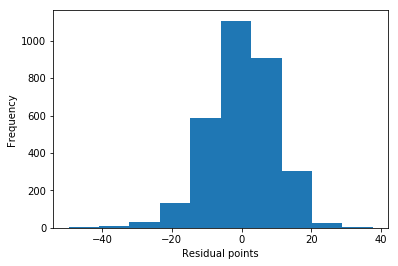

In [70]:
plt.figure()
plt.hist(model_residuals,bins = 10)
plt.xlabel("Residual points")
plt.ylabel("Frequency")
plt.show()

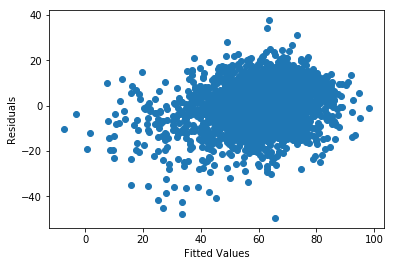

In [71]:
plt.figure()
plt.scatter(res.fittedvalues,model_residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


> If we look at the histgoram of residual points, it seems that the distribution is pretty normal and compared with reiduals' distribution of the model in 2008, this plots are more better.

> ## Republicans vote share in 2016:

> Let's imply predictors and define Republicans vote share in 2016 as an independent variable to see the amount of R_squared:

In [72]:
y = df_merge['Republicans 16 pct']
X = df_merge_numerical_new
X_withconstant = sm.add_constant(X)

lm = sm.OLS(y, X_withconstant)
res = lm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Republicans 16 pct   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     397.5
Date:                Sun, 27 Oct 2019   Prob (F-statistic):               0.00
Time:                        22:31:27   Log-Likelihood:                -10466.
No. Observations:                3109   AIC:                         2.100e+04
Df Residuals:                    3075   BIC:                         2.121e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                        -67.1182    359.927     -0.186      0.852    -772.841     638.604
Votes                                                       -1.04e-05   1.45e-06     -7.182      0.000   -1.32e-05   -7.56e-06
Less Than High School Diploma                                  0.0210      0.037      0.565      0.572      -0.052       0.094
Graduate Degree                                               -1.6061      0.061    -26.173      0.000      -1.726      -1.486
School Enrollment                                              0.0852      0.032      2.653      0.008       0.022       0.148
Median Earnings 2010                                        -9.07e-05   4.81e-05     -1.886      0.059      -0.000    3.61e-06
African American Population                                   -0.2246      2.607     -0.086      0.931      -5.337       4.887
Native American Population                                    -0.1367      2.608     -0.052      0.958      -5.249       4.976
Asian American Population                                     -0.7509      0.090     -8.322      0.000      -0.928      -0.574
Other Race or Races                                           -0.4418      2.612     -0.169      0.866      -5.563       4.679
Latino Population                                             -0.0566      2.608     -0.022      0.983      -5.170       5.057
Preschool.Enrollment.Ratio.enrolled.ages.3.and.4              -0.0121      0.010     -1.210      0.226      -0.032       0.008
Poverty.Rate.below.federal.poverty.threshold                  -0.2038      0.049     -4.157      0.000      -0.300      -0.108
Gini.Coefficient                                               6.0294      5.122      1.177      0.239      -4.012      16.071
Management.professional.and.related.occupations                1.3079      2.502      0.523      0.601      -3.599       6.214
Service.occupations                                            0.8842      2.502      0.353      0.724      -4.022       5.791
Sales.and.office.occupations                                   1.0234      2.501      0.409      0.682      -3.881       5.928
Farming.fishing.and.forestry.occupations                       1.2766      2.502      0.510      0.610      -3.629       6.183
Construction.extraction.maintenance.and.repair.occupations     1.2961      2.502      0.518      0.604      -3.609       6.201
Production.transportation.and.material.moving.occupations      0.9836      2.502      0.393      0.694      -3.922       5.889
White_Asian                                                    0.5935      2.608      0.228      0.820      -4.519       5.706
SIRE_homogeneity                   

In [73]:
get_pvalues(res)

['const',
 'Less Than High School Diploma',
 'Median Earnings 2010',
 'African American Population',
 'Native American Population',
 'Other Race or Races',
 'Latino Population',
 'Preschool.Enrollment.Ratio.enrolled.ages.3.and.4',
 'Gini.Coefficient',
 'Management.professional.and.related.occupations',
 'Service.occupations',
 'Sales.and.office.occupations',
 'Farming.fishing.and.forestry.occupations',
 'Construction.extraction.maintenance.and.repair.occupations',
 'Production.transportation.and.material.moving.occupations',
 'White_Asian',
 'Adult.smoking',
 'HIV.prevalence.rate',
 'Violent.crime',
 'Injury.deaths']

> From the Republicans vote share in 2016 we get 20 predictor variables with high p-value which is higher than its counterpart in 2008 and 2012. Now, we are going to remove these variables (except const) from predictor variables to see the R_squared.

In [74]:
y = df_merge['Republicans 16 pct']
X = df_merge_numerical_new.drop(columns = ['Less Than High School Diploma',
                                          'Gini.Coefficient',
                                           'Median Earnings 2010',
                                           'African American Population',
                                           'Native American Population',
                                           'Other Race or Races',
                                           'Latino Population',
                                           'Preschool.Enrollment.Ratio.enrolled.ages.3.and.4',
                                           'Management.professional.and.related.occupations',
                                           'Service.occupations',
                                           'Sales.and.office.occupations',
                                           'Farming.fishing.and.forestry.occupations',
                                           'Construction.extraction.maintenance.and.repair.occupations',
                                           'Production.transportation.and.material.moving.occupations',
                                           'White_Asian',
                                           'Violent.crime',
                                           'Injury.deaths',
                                           'HIV.prevalence.rate',
                                           'Adult.smoking'
                                          ], axis = 1)
X_withconstant = sm.add_constant(X)

lm = sm.OLS(y, X_withconstant)
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Republicans 16 pct   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     469.4
Date:                Sun, 27 Oct 2019   Prob (F-statistic):               0.00
Time:                        22:31:35   Log-Likelihood:                -11278.
No. Observations:                3109   AIC:                         2.259e+04
Df Residuals:                    3094   BIC:                         2.268e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           69.3441      3.871     17.914      0.000      61.754      76.934
Votes                                        -1.142e-05   1.74e-06     -6.545      0.000   -1.48e-05      -8e-06
Graduate Degree                                 -1.1748      0.061    -19.285      0.000      -1.294      -1.055
School Enrollment                                0.0040      0.038      0.105      0.916      -0.070       0.078
Asian American Population                       -0.5817      0.100     -5.841      0.000      -0.777      -0.386
Poverty.Rate.below.federal.poverty.threshold    -0.3716      0.044     -8.390      0.000      -0.458      -0.285
SIRE_homogeneity                                16.7201      1.572     10.634      0.000      13.637      19.803
median_age                                      -0.2054      0.044     -4.684      0.000      -0.291      -0.119
Low.birthweight                                 18.5387     11.521      1.609      0.108      -4.051      41.128
Teen.births                                      0.1239      0.015      8.298      0.000       0.095       0.153
Children.in.single.parent.households           -42.2751      2.767    -15.276      0.000     -47.701     -36.849
Diabetes                                       162.8919     10.680     15.252      0.000     141.952     183.832
Sexually.transmitted.infections                 -0.0173      0.001    -16.267      0.000      -0.019      -0.015
Uninsured                                       61.7778      4.665     13.242      0.000      52.631      70.925
Unemployment                                  -112.2059      7.219    -15.544      0.000    -126.360     -98.052
==============================================================================
Omnibus:                      685.810   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2487.129
Skew:                          -1.064   Prob(JB):                         0.00
Kurtosis:                       6.830   Cond. No.                     9.18e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.18e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
model_residuals = result.resid

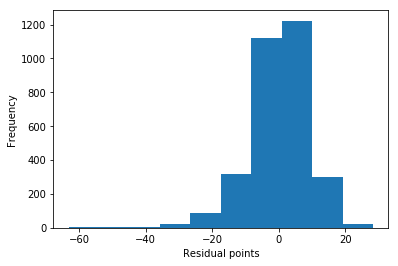

In [76]:
plt.figure()
plt.hist(model_residuals,bins = 10)
plt.xlabel("Residual points")
plt.ylabel("Frequency")
plt.show()

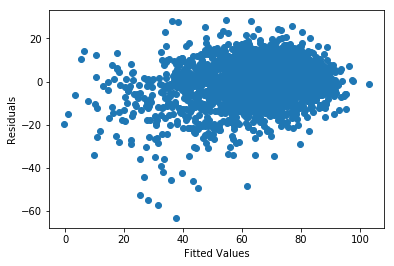

In [77]:
plt.figure()
plt.scatter(res.fittedvalues,model_residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


> ## How does each of their performances compare to your 2008 model from question 1?

> We can have a comparison between three elections based on three factors:
* __1. R_squared:__
>> Our model based on Republicans vote share in 2016 have the highest amount of R_squared (81%) it means that the performance of the model is pretty good. The equivalent model based on Republicans vote share in 2012 was in the second place with (71.8%) and we have 68% for 2008 model.
* __2. p-value:__
>> The total number of independent variables with high p-value in 2016 model was the highest with 20 variables, and 2012 model had the lowest number of independent variables with high p-value.
* __3. Residuals distribution:__
>> All plots of residuals distribution of three models illustrate kind of normal distribution, but 2016 had the best performance in this step.